# Car Insurance Kaggle

Applying Generalized Linear Models


# 1)- Importing key libraries 

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# What's life without style :). So, let's add style to our dataframes
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
import pandas as pd
import numpy as np
import h2o
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas, numpy, seaborn, matplotlib, sys,h2o

Software versions
Python 3.6.5 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.4.0
OS Windows 10 10.0.18362 SP0
pandas 0.24.1
numpy 1.16.0
seaborn 0.9.0
matplotlib 3.0.2
sys The 'sys' distribution was not found and is required by the application
h2o 3.26.0.3
Sun Aug 25 17:39:49 2019 W. Europe Daylight Time

# 2)- Loading data

In [10]:
df_insurance=pd.read_csv('SwedishMotorInsurance.csv')

In [11]:
df_insurance.shape

(2182, 7)

In [12]:
df_insurance.columns

Index(['Kilometres', 'Zone', 'Bonus', 'Make', 'Insured', 'Claims', 'Payment'], dtype='object')

In [13]:
df_insurance.head()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373


# 3)- Exploring data

In [38]:
df_insurance.tail()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
2177,5,7,7,5,8.74,0,0
2178,5,7,7,6,16.61,0,0
2179,5,7,7,7,2.83,1,966
2180,5,7,7,8,13.06,0,0
2181,5,7,7,9,384.87,16,112252


In [39]:
type(df_insurance)

pandas.core.frame.DataFrame

# 4)- Initiate h2o

In [6]:
h2o.init()
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,57 mins 53 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_Hassan_7qq43r
H2O cluster total nodes:,1
H2O cluster free memory:,3.220 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


# 5)-Buidling Poisson Model

A type of GLM. Also known as Count model

In [7]:
insurance = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/glm_test/Motor_insurance_sweden.txt", sep = '\t')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
insurance.head()

Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
1,1,1,1,455.13,108,392491
1,1,1,2,69.17,19,46221
1,1,1,3,72.88,13,15694
1,1,1,4,1292.39,124,422201
1,1,1,5,191.01,40,119373
1,1,1,6,477.66,57,170913
1,1,1,7,105.58,23,56940
1,1,1,8,32.55,14,77487
1,1,1,9,9998.46,1704,6.80599e+06
1,1,2,1,314.58,45,214011


In [9]:
insurance.summary()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
type,int,int,int,int,real,int,int
mins,1.0,1.0,1.0,1.0,0.01,0.0,0.0
mean,2.9857928505957827,3.9702108157653533,4.01512373968836,4.991750687442713,1092.1952703941352,51.865719523372995,257007.6448212649
maxs,5.0,7.0,7.0,9.0,127687.27,3338.0,18245026.0
sigma,1.4104086085546428,1.988857510408954,2.0005158569701793,2.5869431535278427,5661.156244715404,201.7106935118666,1017282.5856477643
zeros,0,0,0,0,0,385,385
missing,0,0,0,0,0,0,0
0,1.0,1.0,1.0,1.0,455.13,108.0,392491.0
1,1.0,1.0,1.0,2.0,69.17,19.0,46221.0
2,1.0,1.0,1.0,3.0,72.88,13.0,15694.0


### 5.1)- Training

In [21]:
poisson_model = H2OGeneralizedLinearEstimator(family = " poisson",lambda_ = 0, remove_collinear_columns= True,compute_p_values=True)
poisson_model.train(y= "Claims" , x = ["Payment", "Insured", "Kilometres", "Zone", "Bonus", "Make"] ,training_frame = insurance)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [22]:
print(poisson_model)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1566744124179_25


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,poisson,log,None,6,6,6,Key_Frame__http___h2o_public_test_data_s3_amazonaws_com_smalldata_...




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 18287.328901692104
RMSE: 135.23065074786894
MAE: 40.41030288136362
RMSLE: 1.7658170521996852
R^2: 0.55033248798047
Mean Residual Deviance: 53.17217585124376
Null degrees of freedom: 2181
Residual degrees of freedom: 2175
Null deviance: 435505.0456453899
Residual deviance: 116021.68770741388
AIC: 123673.42803356209

Scoring History: 

,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2019-08-25 17:56:12,0.000 sec,0,435505.045645,199.589847
1,,2019-08-25 17:56:12,0.015 sec,1,210276.874695,96.368870
2,,2019-08-25 17:56:12,0.015 sec,2,134559.405037,61.667922
3,,2019-08-25 17:56:12,0.031 sec,3,116149.265044,53.230644
4,,2019-08-25 17:56:12,0.031 sec,4,116021.815340,53.172234
5,,2019-08-25 17:56:12,0.031 sec,5,116021.687708,53.172176
6,,2019-08-25 17:56:12,0.031 sec,6,116021.687707,53.172176


### 5.2)-Results

In [24]:
# Coefficients that can be applied to the non-standardized data.
print(poisson_model.coef())

{'Intercept': 2.5822368526491166, 'Kilometres': -0.24677600908636968, 'Zone': -0.11876052909495259, 'Bonus': 0.13082512307229846, 'Make': 0.23191707139739182, 'Insured': -5.4928746201778095e-05, 'Payment': 5.931233707518411e-07}


In [25]:
# Coefficients fitted on the standardized data (requires standardize = True, which is on by default)
print(poisson_model.coef_norm())

{'Intercept': 3.1493060536896644, 'Kilometres': -0.34805500760017394, 'Zone': -0.23619777023063776, 'Bonus': 0.2617177331962081, 'Make': 0.5999562800377105, 'Insured': -0.31096021457458406, 'Payment': 0.6033740762065506}


In [26]:
# Print the Coefficients table
poisson_model._model_json['output']['coefficients_table']


Coefficients: glm coefficients


,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,2.582237e+00,1.604723e-02,160.914793,0.0,3.149306
1,Kilometres,-2.467760e-01,2.602166e-03,-94.834829,0.0,-0.348055
2,Zone,-1.187605e-01,1.829220e-03,-64.924142,0.0,-0.236198
3,Bonus,1.308251e-01,1.598831e-03,81.825491,0.0,0.261718
4,Make,2.319171e-01,1.655148e-03,140.118597,0.0,0.599956
5,Insured,-5.492875e-05,3.562449e-07,-154.188166,0.0,-0.310960
6,Payment,5.931234e-07,2.280965e-09,260.031722,0.0,0.603374


# 6)-Quantities of interest

### 6a)-Standard error

In [28]:
# Print the Standard error
print(poisson_model._model_json['output']['coefficients_table']['std_error'])

[0.016047231002516732, 0.002602166435357356, 0.001829219855678322, 0.0015988308907284264, 0.001655148398401047, 3.562448896838998e-07, 2.28096543615261e-09]


### 6b)-p values

In [29]:
# Print the p values
print(poisson_model._model_json['output']['coefficients_table']['p_value'])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### 6c)-z values

In [31]:
# Print the z values
print(poisson_model._model_json['output']['coefficients_table']['z_value'])

[160.91479285392833, -94.8348290613778, -64.92414169149346, 81.82549125798703, 140.11859699192826, -154.1881660408294, 260.0317222484022]


### 6d)-graphical plot

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


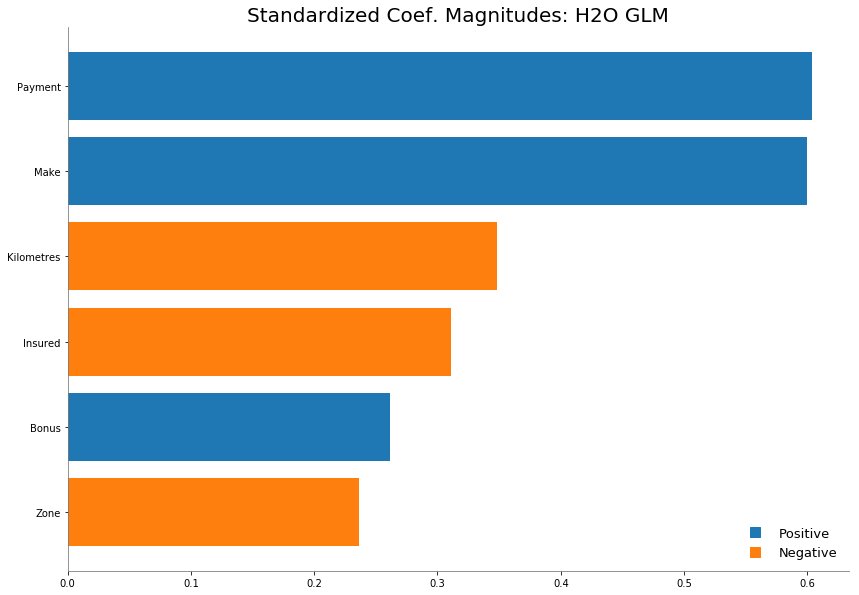

In [32]:
# Retrieve a graphical plot of the standardized coefficient magnitudes
poisson_model.std_coef_plot()